In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy, wasserstein_distance

/tmp/ipykernel_1154274/4285750835.py:34: RuntimeWarning: divide by zero encountered in divide
  fractional_diff = np.where(real_hist != 0, (gen_hist - real_hist) / real_hist, 0)


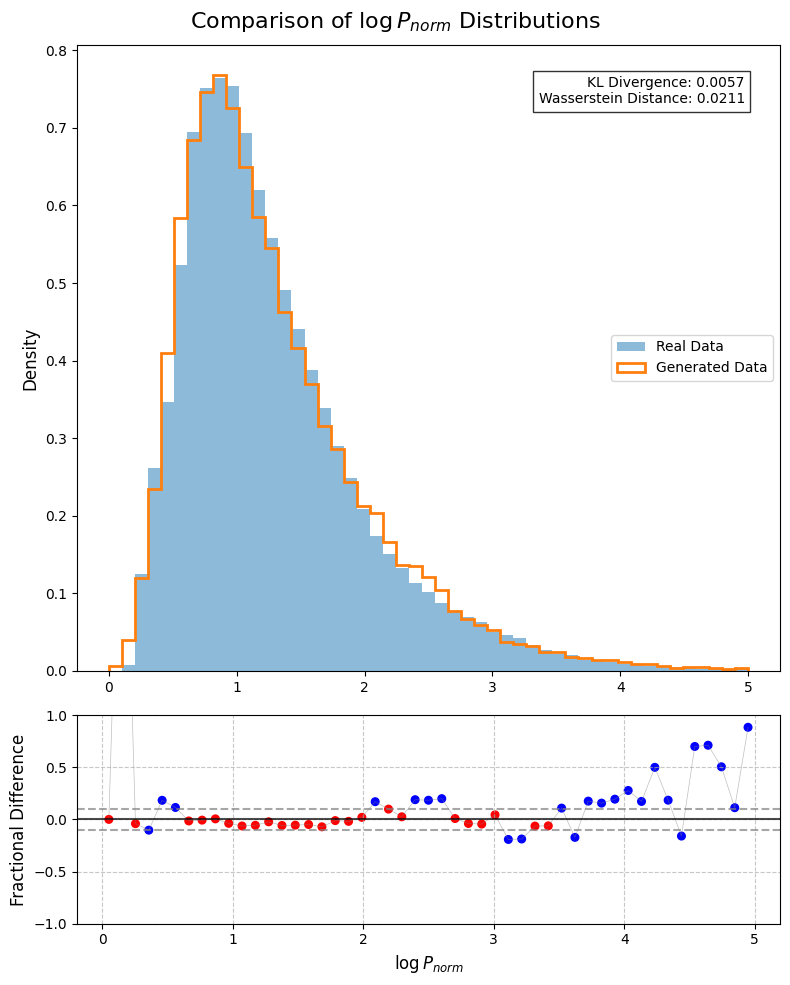

In [ ]:
gen_data = "/work/submit/haoyun22/FCC-Beam-Background/diffusion_model/checks_model_kmax128/gen_pnorm.npy"
real_data = "/work/submit/haoyun22/FCC-Beam-Background/diffusion_model/checks_model_kmax128/real_pnorm.npy"

gen_pnorm = np.load(gen_data)
real_pnorm = np.load(real_data)

# Convert into log scale for better visualization
gen_pnorm = np.log1p(np.abs(gen_pnorm))
real_pnorm = np.log1p(np.abs(real_pnorm))

# Define bins first
bins = np.linspace(0, 5, 50)

# Calculate histograms for fractional difsference
real_hist, _ = np.histogram(real_pnorm, bins=bins, density=True)
gen_hist, _ = np.histogram(gen_pnorm, bins=bins, density=True)

kl_div = entropy(real_hist + 1e-10, gen_hist + 1e-10)  # Adding small value to avoid log(0)
wass_dist = wasserstein_distance(real_pnorm, gen_pnorm)


# Create a plot with two subplots, the upper for histograms and the lower for the fractional difference
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [3, 1]})
# Plot title
fig.suptitle('Comparison of $\log P_{norm}$ Distributions', fontsize=16)

# Plot histograms in log scale
ax1.hist(real_pnorm, bins=bins, alpha=0.5, label='Real Data', density=True)
ax1.hist(gen_pnorm, bins=bins, histtype='step', label='Generated Data', density=True, linewidth=2)
ax1.set_ylabel('Density', fontsize=12)
ax1.legend()


fractional_diff = np.where(real_hist != 0, (gen_hist - real_hist) / real_hist, 0)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Annotate KL divergence and Wasserstein distance on the middle right of histogram plot
ax1.text(0.95, 0.95, f'KL Divergence: {kl_div:.4f}\nWasserstein Distance: {wass_dist:.4f}',
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax1.transAxes,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))


# Plot fractional difference with color coding
colors = ['red' if abs(fd) < 0.1 else 'blue' for fd in fractional_diff]
ax2.scatter(bin_centers, fractional_diff, c=colors, marker='o', s=30)
ax2.plot(bin_centers, fractional_diff, color='gray', alpha=0.5, linewidth=0.5)
ax2.set_xlabel('$\log P_{norm}$', fontsize=12)
ax2.set_ylabel('Fractional Difference', fontsize=12)
ax2.axhline(0, color='black', linestyle='-', alpha=0.7)
ax2.axhline(0.1, color='grey', linestyle='--', alpha=0.7)
ax2.axhline(-0.1, color='grey', linestyle='--', alpha=0.7)
ax2.set_ylim(-1, 1)
# Add grid lines for better readability
ax2.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
